<a href="https://colab.research.google.com/github/harry-zhao78/colab/blob/master/uvic_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

data_to_load = files.upload()


Saving uvic2018.csv to uvic2018.csv


In [ ]:
#data cleaning and preparation
import pandas as pd
import re

df= pd.read_csv("uvic2018.csv")
df.columns
df=df.drop(['计划入读时间','客户背景及意向','合同 NAME','留学合同备注'],axis=1)


df=df.dropna(subset=['合同编号'])
df["申请导师"]=df["申请导师"].fillna(method='ffill')
df["留学申请状态"]=df.留学申请状态.fillna(method='ffill')
df.申请导师=df.申请导师.apply(lambda x: re.sub('\W+','', x))
df.申请导师=df.申请导师.apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df.留学申请状态=df.留学申请状态.apply(lambda x: 1 if "CAS" in x else 0)

df["申请文案"]=df["申请文案"].fillna(value="unknown")
df["文书文案"]=df["文书文案"].fillna(value="unknown")
df=df.reset_index(drop=True)
df

,申请导师,留学申请状态,合同编号,分派申请导师日期,全名(母语),合同 OWNER,申请文案,文书文案
0,AmmyYang,1,SC954,"5 Jan, 2017",余霞,Soko Wang-伦敦办公室,曹萨尹 Toni,unknown
1,AmmyYang,1,SC991,"12 Jan, 2017",李骁西,Soko Wang-伦敦办公室,王琳 Sherly,吴茜
2,AmmyYang,1,SC1093,"26 Jan, 2017",相欣仪,Alice Jiang-伦敦办公室,王琳 Sherly,黄珊
3,AmmyYang,1,SC1346,"9 Mar, 2017",孟姝含,Soko Wang-伦敦办公室,李丹丹 Summer,李丹丹 Summer
4,AmmyYang,1,SC1449,"17 Mar, 2017",肖琪芮,Joyce fan-伦敦办公室,胡成莱 Jenny,胡成莱 Jenny
...,...,...,...,...,...,...,...,...
1922,ZhouWang,0,SC31250,"18 Nov, 2017",刘依婕,Emily Wu-伦敦办公室,肖骏 Antoni,unknown
1923,ZhouWang,0,SC31343,"27 Nov, 2017",王诗涵,Christine Chen-伦敦办公室,unknown,unknown
1924,ZhouWang,0,SC31235,"18 Nov, 2017",朱丽娟,Christine Chen-伦敦办公室,胡成莱 Jenny,胡成莱 Jenny
1925,国子昂,0,SC33819,"13 Aug, 2018",张嘉文,国子昂-曼彻斯特办公室,unknown,unknown


In [ ]:
dum1=pd.get_dummies(df.申请导师)
dum2=pd.get_dummies(df["合同 OWNER"])
dum3=pd.get_dummies(df["申请文案"])
dum4=pd.get_dummies(df["文书文案"])



target=df.留学申请状态
final_df=pd.concat([dum1,dum2,dum3,dum4],axis=1)
final_df

X=final_df
y=target

#pyplot.hist(x=df["文书文案"],bins=20);



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


import numpy as np
from matplotlib import pyplot
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)


#model=DecisionTreeClassifier()
#model.fit(X_train,y_train)
#model.score(X_test,y_test)


model2=LogisticRegression(random_state=0).fit(X, y)


importance = model2.coef_[0]
# summarize feature importance
t=0
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v),final_df.columns[t])
  t=t+1
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

model2.score(X_test,y_test)


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn  import linear_model


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(linear_model.RidgeClassifier(), X, y, cv=cv)


array([0.65025907, 0.61658031, 0.60362694, 0.64248705, 0.65284974])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_classification' : {
            'model': linear_model.RidgeClassifier(),
            'params': {
                'alpha': [0.5,0.2,1,2,3,4,5,6,7,8,],
                'normalize': [True, False]
            }
        },
        ' Support Vector Machine': {
            'model': svm.SVC(),
            'params': {
                
                'C': [1,2,3,4,5,6]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ["gini", "entropy"],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_classification,0.638342,"{'alpha': 0.2, 'normalize': True}"
1,Support Vector Machine,0.630052,{'C': 3}
2,decision_tree,0.619689,"{'criterion': 'entropy', 'splitter': 'random'}"


[Text(325.322928993251, 215.65770491803278, 'X[49] <= 0.5\ngini = 0.494\nsamples = 1541\nvalue = [856, 685]'),
 Text(318.65414107955576, 212.09311475409837, 'X[3] <= 0.5\ngini = 0.493\nsamples = 1226\nvalue = [542, 684]'),
 Text(308.12484834521894, 208.52852459016393, 'X[23] <= 0.5\ngini = 0.496\nsamples = 1167\nvalue = [530, 637]'),
 Text(295.2570885646187, 204.9639344262295, 'X[12] <= 0.5\ngini = 0.494\nsamples = 1128\nvalue = [503, 625]'),
 Text(280.7547013756332, 201.39934426229507, 'X[87] <= 0.5\ngini = 0.492\nsamples = 1071\nvalue = [469, 602]'),
 Text(265.3232952807552, 197.83475409836066, 'X[67] <= 0.5\ngini = 0.49\nsamples = 1031\nvalue = [444, 587]'),
 Text(249.8475342050228, 194.27016393442622, 'X[43] <= 0.5\ngini = 0.493\nsamples = 921\nvalue = [407, 514]'),
 Text(236.9743344650915, 190.7055737704918, 'X[72] <= 0.5\ngini = 0.495\nsamples = 880\nvalue = [397, 483]'),
 Text(224.09923249505843, 187.14098360655737, 'X[61] <= 0.5\ngini = 0.494\nsamples = 860\nvalue = [383, 477]'

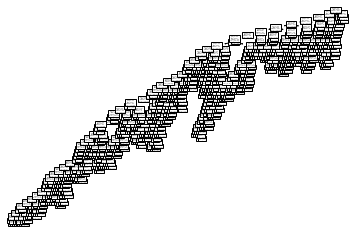

In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)
tree.plot_tree(model) 
